# 直方图
cv2.calcHist(images, channels, mask, histSize, ranges)
+ images: 原图像,dtype:uint8 or float32, 需要传入[images]
+ channels: 需要传入[channels], 如果image是灰度图, 值就是[0], 如果是彩色图像, 值可以是BGR:[0][1][2]
+ mask: 掩码, 统计整个图像指定为None, 统计一部分图像需要设定掩码
+ histSize: bins数量, 需要用[]
+ ranges: 像素值范围, 常用[0-256]

In [13]:
import cv2
import matplotlib.pyplot as plt

In [6]:
def imshow(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
img = cv2.imread('./img/cat1.jpg')
img = cv2.resize(img, (int(img.shape[1]/4), int(img.shape[0]/4)))

In [10]:
imshow('cat', img)

In [26]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

(256, 1)


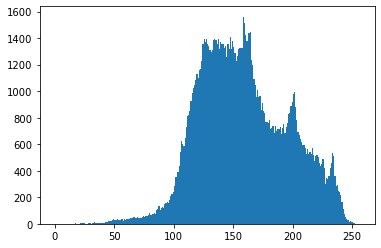

In [27]:
print(hist.shape)
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

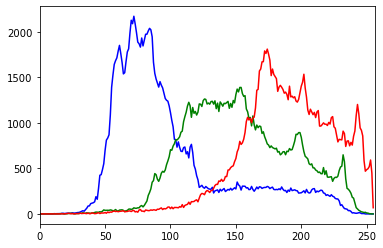

In [28]:
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

## Mask

In [30]:
import numpy as np

In [35]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:250, 100:400] = 255
imshow('mask', mask)

In [49]:
img2 = img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [50]:
mask_img2 = cv2.bitwise_and(img2, img2, mask=mask)
imshow('mask_img2', mask_img2)

In [51]:
hist_full = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img2], [0], mask, [256], [0, 256])

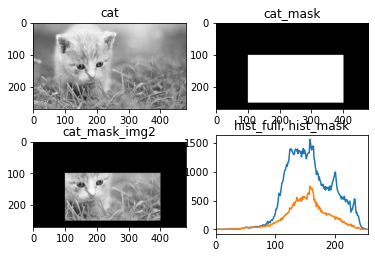

In [53]:
plt.subplot(221), plt.imshow(img2, 'gray'), plt.title('cat')
plt.subplot(222), plt.imshow(mask, 'gray'), plt.title('cat_mask')
plt.subplot(223), plt.imshow(mask_img2, 'gray'), plt.title('cat_mask_img2')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.title('hist_full, hist_mask')
plt.xlim([0, 256])
plt.show()

## 均衡化

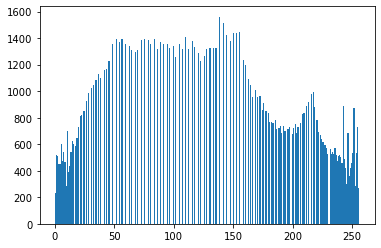

In [54]:
equ = cv2.equalizeHist(img2)
plt.hist(equ.ravel(), 256, [0, 256])
plt.show()